# Env Setup

In [1]:
!git clone https://github.com/guoyww/AnimateDiff.git
%cd AnimateDiff

Cloning into 'AnimateDiff'...
remote: Enumerating objects: 305, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 305 (delta 92), reused 97 (delta 74), pack-reused 173
Receiving objects: 100% (305/305), 25.41 MiB | 13.94 MiB/s, done.
Resolving deltas: 100% (118/118), done.
/content/AnimateDiff


In [2]:
import yaml

# Load the YAML file
with open('environment.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Extract the packages under the `pip` key
if 'dependencies' in data:
  pip_dict = dict()
  for instance in data['dependencies']:
    if isinstance(instance, dict):
      pip_dict = instance
      break
if 'pip' in pip_dict:
  to_install = pip_dict['pip']
  with open("requirements.txt", "w") as fp:
    fp.write('\n'.join(to_install))

!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 109.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Download Stuff

In [3]:
# Download Motion Checkpoints
!gdown 1RqkQuGPaCO5sGZ6V6KZ-jUWmsRu48Kdq -O models/Motion_Module/
!gdown 1ql0g_Ys4UCz2RnokYlBjyOYPbttbIpbu -O models/Motion_Module/

# Download LoRA File from CivitAI
!wget https://civitai.com/api/download/models/78775 -P models/DreamBooth_LoRA/ --content-disposition --no-check-certificate # ToonYou

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1RqkQuGPaCO5sGZ6V6KZ-jUWmsRu48Kdq 

Access denied with the following error:

 	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator. 

You may still be able to access the file from the browser:

	 https://drive.goo

In [4]:
# Download Manually and Put it in you Drive if gdown returns error above
!cp ../drive/MyDrive/AnimateDiff/mm_sd_v14.ckpt models/Motion_Module/
!cp ../drive/MyDrive/AnimateDiff/mm_sd_v15.ckpt models/Motion_Module/

# Stable Diffusion Checkpoint

In [ ]:
# You don't have enough space to save it onto colab
# So, you would need around 70GB of storage in your drive
# Upload the checkpoint to your drive, and mount it
!git lfs install
!git clone https://huggingface.co/runwayml/stable-diffusion-v1-5

path_of_sd_ckpt = "drive/MyDrive/AnimateDiff/models/StableDiffusion"

# Inference

In [27]:
import ipywidgets as widgets
from IPython.display import display
from glob import glob

# Define the dropdown menu
dropdown_base = widgets.Dropdown(
    options=[""] + glob("models/DreamBooth_LoRA/*.safetensors"),
    description='base:'
)

dropdown_path = widgets.Dropdown(
    options=glob("models/DreamBooth_LoRA/*.safetensors"),
    description='path:'
)

# Define the slider
slider_step = widgets.IntSlider(min=1, max=100, step=1, value=25, description='step:')
slider_height = widgets.IntSlider(min=0, max=1152, step=128, value=512, description='height:')
slider_width = widgets.IntSlider(min=0, max=1152, step=128, value=512, description='width:')
slider_frame = widgets.IntSlider(min=1, max=100, step=1, value=16, description='frame:')

# Define the text box
text_box_pos = widgets.Text(value='best quality, masterpiece', description='Pos Prompt:')
text_box_neg = widgets.Text(value='', description='Neg Prompt:')

# Display the dropdown and slider
display(
    dropdown_base,
    dropdown_path,
    slider_step,
    slider_height,
    slider_width,
    slider_frame,
    text_box_pos,
    text_box_neg
)

Dropdown(description='base:', options=('', 'models/DreamBooth_LoRA/toonyou_beta3.safetensors'), value='')

Dropdown(description='path:', options=('models/DreamBooth_LoRA/toonyou_beta3.safetensors',), value='models/Dre…

IntSlider(value=25, description='step:', min=1)

IntSlider(value=512, description='height:', max=1152, step=128)

IntSlider(value=512, description='width:', max=1152, step=128)

IntSlider(value=16, description='frame:', min=1)

Text(value='best quality, masterpiece', description='Pos Prompt:')

Text(value='', description='Neg Prompt:')

In [ ]:
import os
sd_ckpt = os.path.join("../", path_of_sd_ckpt)

In [34]:
prompt_dict = {
    "NotebookTrial":{
        "base": dropdown_base.value,
        "path": dropdown_path.value,
        "motion_module": ["models/Motion_Module/mm_sd_v14.ckpt", "models/Motion_Module/mm_sd_v15.ckpt"],
        "seed": -1,
        "guidance_scale": 7.5,
        "steps": slider_step.value,
        'prompt': [text_box_pos.value],
        'n_prompt': [text_box_neg.value]
    }
}

from omegaconf import OmegaConf
# dumps to file:
with open("configs/prompts/NotebookTrial.yaml", "w") as f:
    OmegaConf.save(prompt_dict, f)

H, W, L = slider_height.value, slider_width.value, slider_frame.value
!python -m scripts.animate \
  --config configs/prompts/NotebookTrial.yaml \
  --pretrained_model_path ../drive/MyDrive/AnimateDiff/models/StableDiffusion \
  --H $H \
  --W $W \
  --L $L

2023-07-20 05:19:54.089899: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
loaded temporal unet's pretrained weights from ../drive/MyDrive/AnimateDiff/models/StableDiffusion/unet ...
### missing keys: 560; 
### unexpected keys: 0;
### Temporal Module Parameters: 417.1376 M
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.6.mlp.fc1.bias', 'vision_model.encoder.layers.18.self_attn.k_proj.bias', 'vision_model.encoder.layers.1.self_attn.k_proj.bias', 'vision_model.encoder.layers.20.layer_norm1.weight', 'vision_model.encoder.layers.10.self_attn.k_proj

# Check out ./samples for your Gif

['samples/NotebookTrial-2023-07-20T04-19-57/sample/0-best-quality,-masterpiece.gif', 'samples/NotebookTrial-2023-07-20T05-19-58/sample/0-best-quality,-masterpiece,-landscape,-angel,-clouds,-high-resolution.gif', 'samples/NotebookTrial-2023-07-20T04-50-00/sample/0-best-quality,-masterpiece,-landscape,-scenery,-cloud,-angel.gif', 'samples/NotebookTrial-2023-07-20T05-13-58/sample/0-best-quality,-masterpiece,-landscape,-angel,-clouds,-high-resolution.gif', 'samples/NotebookTrial-2023-07-20T05-06-05/sample/0-best-quality,-masterpiece.gif']



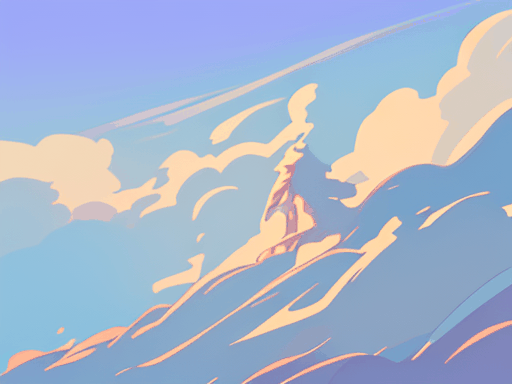

In [35]:
generated = glob("samples/*/*/*.gif")
print(generated)

from IPython.display import HTML
import base64

# Replace "path/to/gif/file.gif" with the actual path to your GIF file
with open(sorted(generated)[-1], "rb") as f:
    display(HTML(f'<img src="data:image/gif;base64,{base64.b64encode(f.read()).decode()}" />'))